**Entropy of Laser with Fixed Average Photon Numbers**

- author: Longfei Fan
- created: 05/24/2017
- modified: 05/30/2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import poisson

from qutip import *
import laser, entropy_utils

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport laser, entropy_utils

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

**helpers**

In [3]:
def plot_n_vs_t(filename, xlim, ylim):
    n1_df = pd.read_csv(filename)
    entropy_utils.df_plot(n1_df, xlim=xlim, ylim=ylim, \
                          style = ['-', '-.', ':', '--'], \
                          xlabel=r'$gt$', ylabel=r'$\bar{n}$ (mean photon number)')
    plt.title(r'Evolution of $\bar{n}$ under Different $A/C$', fontsize=14);
    
    
def plot_entr_vs_t(filename, xlim, ylim):
    entr1_df = pd.read_csv(filename)
    entropy_utils.df_plot(entr1_df, xlim=xlim, ylim=ylim, \
                          xlabel=r'$gt$', ylabel=r'$S$ (entropy)', \
                          style = ['-', '-.', ':', '--'], \
                          entr_cohe=ENTR_COHE, entr_thml=False)
    plt.title(r'Evolution of $S$ under Different $A/C$', fontsize=14)

In [5]:
G = 0.001
KAPPA = 0.0001

NBAR = 200
N_max = 1000
n_list = np.arange(N_max)


# vacuum
vacu = fock(N_max, 0)

# squeezed vacuum
s = 1
s_op = squeeze(N_max, s)
svac = s_op * vacu

# thermal state
n_thml = 20
thml = thermal_dm(N_max, n_thml)


init_psi = thml
solver = 'pn'

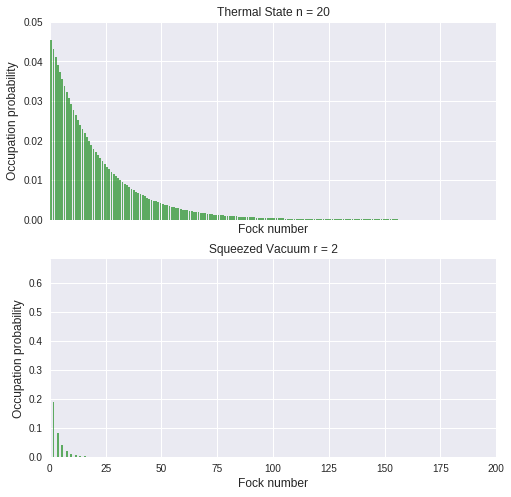

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

plot_fock_distribution(thml, ax=axes[0], unit_y_range=False)
axes[0].set_xlim(0, 200)
axes[0].set_title("Thermal State n = 20")

plot_fock_distribution(svac, ax=axes[1], unit_y_range=False)
axes[1].set_xlim(0, 200)
axes[1].set_title("Squeezed Vacuum r = 2");

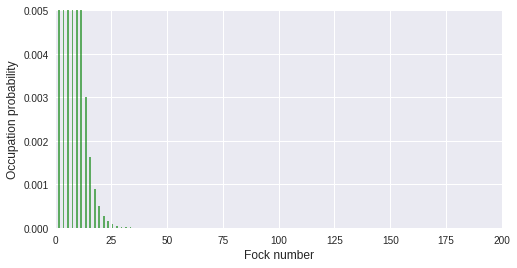

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_fock_distribution(svac, fig=fig, ax=ax, unit_y_range=False)
plt.xlim(0, 200)
plt.ylim(0.0, 0.005);

In [13]:
entropy_vn(vacu), entropy_vn(svac), entropy_vn(thml)

(-0.0, -4.313323007865411e-11, 4.020325721112061)

In [15]:
nn = create(N_max) * destroy(N_max)
expect(nn, vacu), expect(nn, svac), expect(nn, thml)

(0.0, 1.381097845541869, 19.99999999999996)

The entropy calculated given on the photon statistics of a **coherent state**

In [16]:
pns_cohe = [poisson.pmf(n, NBAR) for n in n_list]
ENTR_COHE = - sum([pn * np.log(pn) for pn in pns_cohe if pn > 0])
print('ENTROPY COHERENT: {:.4f}'.format(ENTR_COHE))

ENTROPY COHERENT: 4.0677


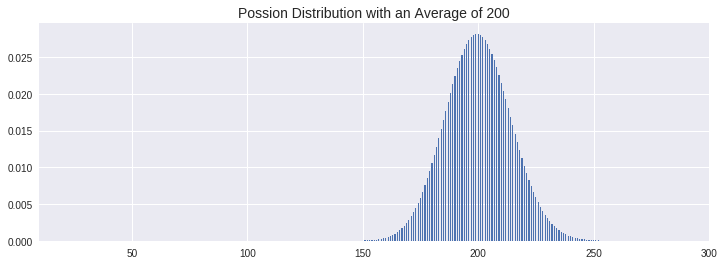

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(n_list, pns_cohe, width=0.5)
ax.set_xlim(10, 300)
ax.set_title('Possion Distribution with an Average of 200', fontsize=14);

## Small Ratios

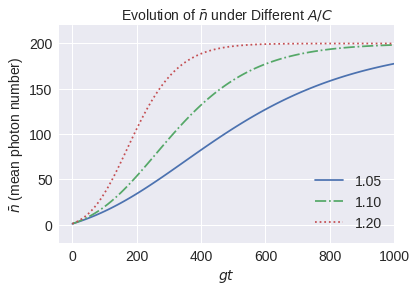

In [70]:
plot_n_vs_t('./data/200_thml_n1_df.csv', xlim=(-40, 1000), ylim=(-20, 220))

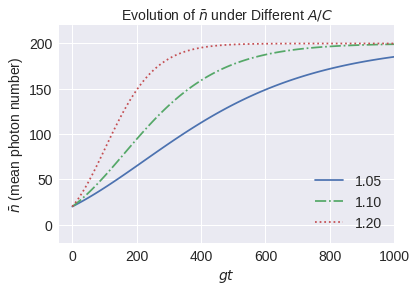

In [20]:
plot_n_vs_t('../data/200_thml_n1_df.csv', xlim=(-40, 1000), ylim=(-20, 220))

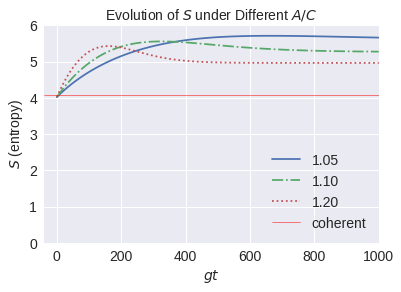

In [21]:
plot_entr_vs_t('../data/200_thml_entr1_df.csv', xlim=(-40, 1000), ylim=(0, 6))

### Medium Ratios

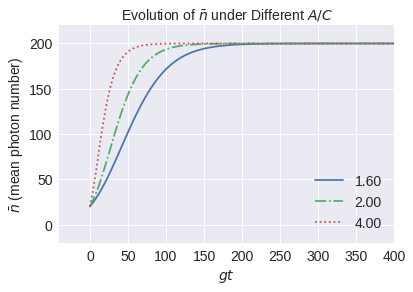

In [23]:
plot_n_vs_t('../data/200_thml_n2_df.csv', xlim=(-40, 400), ylim=(-20, 220))

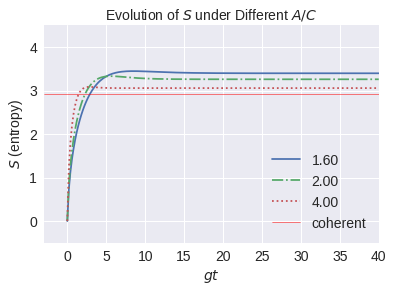

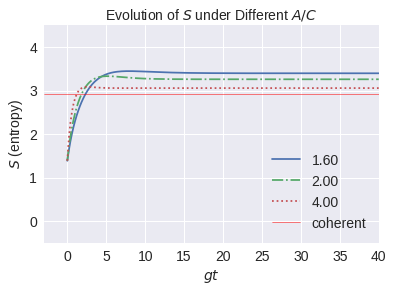

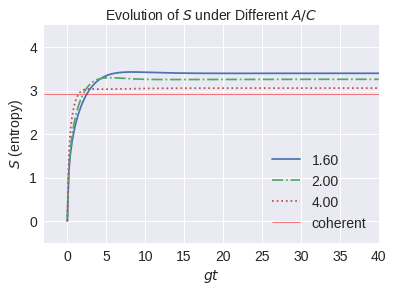

In [45]:
plot_entr_vs_t('./data/vacu_entr2_df.csv', 40)
plot_entr_vs_t('./data/thml_entr2_df.csv', 40)
plot_entr_vs_t('./data/svac_entr2_df.csv', 40)

### Large Ratios

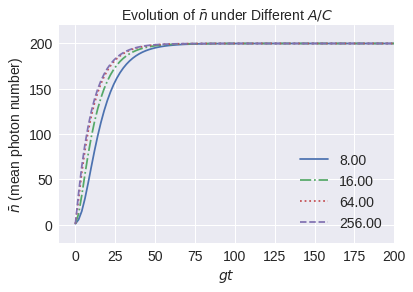

In [74]:
plot_n_vs_t('./data/200_thml_n3_df.csv', xlim=(-10, 200), ylim=(-20, 220))

### Evolution of Photon Statistics for A/C = 4

In [23]:
# laser_m = np.load('./data/vacu_l2.npz')
# laser4 = laser_m['lasers'].flatten()[0]['4.00']

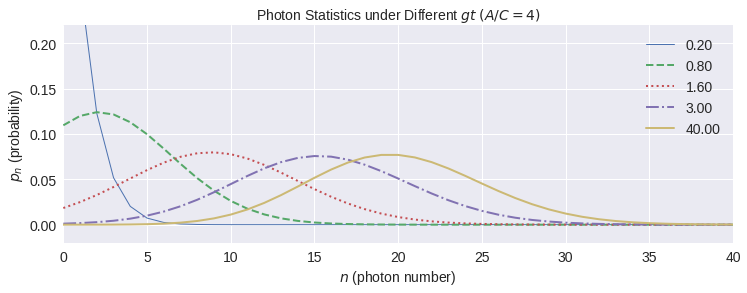

In [24]:
# lstyle = ['-', '--', ':', '-.', '-', '--']
# lwidth = [1, 2, 2, 2, 2, 2]
# fig, ax = plt.subplots(sharex=True, figsize=(12, 4))
# t_list4 = laser4.t_list
# pns4 = laser4.get_pns()
# gts = (1, 4, 8, 15, 200)
# for i in range(len(gts)):
#     pns = pns4[gts[i]]
#     ax.plot(np.arange(N_max), pns, \
#             linestyle=lstyle[i], linewidth=lwidth[i], \
#             label='{:4.2f}'.format(t_list4[gts[i]] * G))
# ax.set_xlim(0, 40)
# ax.set_ylim(-0.02, 0.22)
# ax.set_xlabel(r'$n$ (photon number)', fontsize=14)
# ax.set_ylabel(r'$p_n$ (probability)', fontsize=14)
# ax.tick_params(labelsize=14)
# ax.legend(fontsize=14)
# plt.title(r'Photon Statistics under Different $gt$ $(A/C = 4)$', fontsize=14);

### Evolution of Photon Statistics for A/C = 64

In [25]:
# laser_l = np.load('./data/vacu_l3.npz')
# laser64 = laser_l['lasers'].flatten()[0]['64.00']

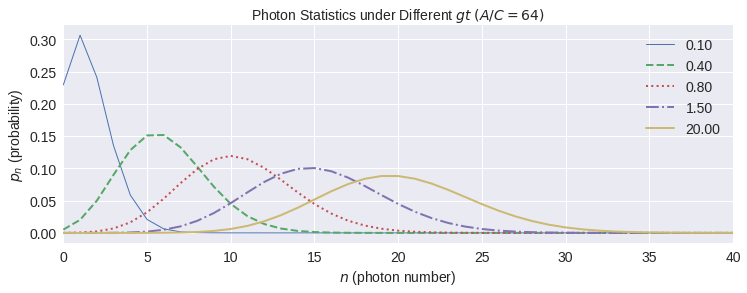

In [26]:
# lstyle = ['-', '--', ':', '-.', '-']
# lwidth = [1, 2, 2, 2, 2]
# fig, ax = plt.subplots(sharex=True, figsize=(12, 4))
# t_list64 = laser64.t_list
# pns64 = laser64.get_pns()
# gts = (1, 4, 8, 15, 200)
# for i in range(len(gts)):
#     pns = pns64[gts[i]]
#     ax.plot(np.arange(N_max), pns, \
#             linestyle=lstyle[i], linewidth=lwidth[i], \
#             label='{:4.2f}'.format(t_list64[gts[i]] * G))
# ax.set_xlim(0, 40)
# # ax.set_ylim(0, 0.06)
# ax.tick_params(labelsize=14)
# ax.set_xlabel(r'$n$ (photon number)', fontsize=14)
# ax.set_ylabel(r'$p_n$ (probability)', fontsize=14)
# plt.title(r'Photon Statistics under Different $gt$ $(A/C = 64)$', fontsize=14);
# ax.legend(fontsize=14);